# Column Information


**Gender**: Indicates the gender of the individual, typically represented as 'M' for male and 'F' for female.

**Age**: Represents the age of the individual in years.

**Height**: Indicates the height of the individual, usually measured in centimeters (cm) or meters (m).

**Weight**: Represents the weight of the individual, typically measured in kilograms (kg) or pounds (lbs).

**family_history_with_overweight**: This column indicates whether the individual has a family history of overweight or obesity. It is typically represented as a binary value, with '1' indicating a positive family history and '0' indicating no known family history of overweight.

**FAVC**: This column likely refers to the individual's physical activity level. It could represent the frequency of their physical activity (e.g., number of times per week) or the intensity of their physical activity (e.g., light, moderate, or vigorous).

**FCVC**: Similar to FAVC, this column could represent the individual's cardiovascular fitness level. It could indicate their performance on a cardiovascular fitness test or their estimated maximal oxygen uptake (VO2 max).

**NCP**: This column could refer to the individual's non-communicable diseases profile. It might indicate the presence or absence of chronic conditions such as hypertension, diabetes, or cardiovascular disease.

**CAEC**: This column could represent the individual's alcohol consumption pattern. It might indicate the frequency or quantity of their alcohol intake.

**SMOKE**: This column likely indicates the individual's smoking status. It could be a binary value ('1' for smoker, '0' for non-smoker) or it could provide more detailed information about their smoking habits (e.g., number of cigarettes smoked per day).

**CH2O**: This column could refer to the individual's cholesterol levels. It might provide specific values for total cholesterol, HDL cholesterol, LDL cholesterol, or triglycerides.

**SCC**: This column could represent the individual's blood sugar control. It might indicate their fasting blood glucose levels or their hemoglobin A1c (HbA1c) levels.

**FAF**: This column could refer to the individual's physical fitness level. It might provide an overall assessment of their physical fitness based on various tests or measurements.

**TUE**: This column could represent the individual's use of tobacco products. It might indicate whether they use tobacco products (e.g., cigarettes, cigars, pipes) or not.

**CALC**: This column could refer to the individual's calcium intake. It might indicate their daily calcium intake or their calcium intake relative to recommended guidelines.

**MTRANS**: This column could represent the individual's mode of transportation. It might indicate whether they primarily use public transportation, walk, cycle, or drive to commute.

**NObeyesdad**: This column name is unclear and does not provide any obvious context. It is possible that it is a placeholder or a custom column name specific to your dataset.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [156]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [157]:
print(df_train.shape)
print(df_test.shape)

(20758, 18)
(13840, 17)


In [54]:
df = pd.concat([df_train,df_test])
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [52]:
df_train.shape

(20758, 18)

In [53]:
df_test.shape

(13840, 17)

In [55]:
df.isna().sum()

id                                    0
Gender                                0
Age                                   0
Height                                0
Weight                                0
family_history_with_overweight        0
FAVC                                  0
FCVC                                  0
NCP                                   0
CAEC                                  0
SMOKE                                 0
CH2O                                  0
SCC                                   0
FAF                                   0
TUE                                   0
CALC                                  0
MTRANS                                0
NObeyesdad                        13840
dtype: int64

In [56]:
df.duplicated().sum()

0

In [57]:
categorical_columns = df.select_dtypes(include='object').columns
numerical_columns = df.select_dtypes(exclude='object').columns

In [158]:
categorical_columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [159]:
numerical_columns


Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [108]:
df_train[categorical_columns].describe(include='object')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,20758,20758,20758,20758,20758,20758,20758,20758,20758
unique,2,2,2,4,2,2,3,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17014,18982,17529,20513,20071,15066,16687,4046


split into single/multi category for onehot or labelencoding

In [280]:
multi_category = []
single_category = []
for i in categorical_columns:
    if len(df[i].unique()) > 2:
        multi_category.append(i)
    else:
        single_category.append(i)

print('multi_category', multi_category)
print('single_category', single_category)

multi_category ['CAEC', 'CALC', 'MTRANS', 'NObeyesdad']
single_category ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']


In [110]:
df_train[numerical_columns].describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [111]:
backupid = df_train['id']

In [123]:
df_train.drop(columns='id',inplace=True)

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

sc = StandardScaler()
le = LabelEncoder()

In [167]:
#added the target column for classification (labelencoder and not onehot)
single_category.append('NObeyesdad')

In [281]:
single_category

['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

In [169]:
#labelencode the df of single_category

for i in single_category:
    df_train[i] = le.fit_transform(df_train[i])

In [282]:

for i in single_category:
    df_test[i] = le.fit_transform(df_test[i])

In [170]:
df_train

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,6
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,no,Automobile,1
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,no,Public_Transportation,0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,4
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,1,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,Sometimes,0,2.151809,0,1.330519,0.196680,Sometimes,Public_Transportation,3
20754,20754,1,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,Frequently,0,1.000000,0,2.000000,1.000000,Sometimes,Public_Transportation,0
20755,20755,1,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,Sometimes,0,2.000000,0,1.158040,1.198439,no,Public_Transportation,3
20756,20756,1,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,Sometimes,0,2.144838,0,0.000000,0.973834,no,Automobile,6


In [283]:
df_test

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,Sometimes,0,2.825629,0,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,Sometimes,0,3.000000,0,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,Sometimes,0,2.621877,0,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,Sometimes,0,2.786417,0,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,Sometimes,0,2.653531,0,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,1,23.327836,1.721384,78.030383,1,0,2.813234,3.000000,Sometimes,0,1.000000,0,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,0,29.000000,1.590000,62.000000,0,1,3.000000,3.000000,Sometimes,0,2.000000,0,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,0,22.935612,1.585547,44.376637,0,1,3.000000,2.273740,Frequently,0,2.000000,0,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,1,21.000000,1.620000,53.000000,1,1,2.000000,3.000000,Sometimes,0,2.000000,0,3.000000,2.000000,no,Public_Transportation


In [286]:
multi_category.remove('NObeyesdad')

In [285]:
multi_category

['CAEC', 'CALC', 'MTRANS', 'NObeyesdad']

In [175]:
multi_category_df = pd.get_dummies(df_train[multi_category])

In [288]:
multi_category_df = pd.get_dummies(df_test[multi_category])

In [289]:
multi_category_df

,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,0,1,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,0,1,0
3,0,0,1,0,0,0,1,0,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,0,0,1,0,0,0,1,0,0,0,0,1,0
13836,0,0,1,0,0,0,1,0,0,0,0,1,0
13837,0,1,0,0,0,0,1,0,0,0,0,1,0
13838,0,0,1,0,0,0,0,1,0,0,0,1,0


In [177]:
df_train

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,6
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,no,Automobile,1
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,no,Public_Transportation,0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,4
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,1,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,Sometimes,0,2.151809,0,1.330519,0.196680,Sometimes,Public_Transportation,3
20754,20754,1,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,Frequently,0,1.000000,0,2.000000,1.000000,Sometimes,Public_Transportation,0
20755,20755,1,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,Sometimes,0,2.000000,0,1.158040,1.198439,no,Public_Transportation,3
20756,20756,1,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,Sometimes,0,2.144838,0,0.000000,0.973834,no,Automobile,6


In [178]:
df_train.drop(columns = multi_category,inplace=True)

In [290]:
df_test.drop(columns = multi_category,inplace=True)

In [130]:
df_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,0,2.763573,0,0.000000,0.976473
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,0,2.000000,0,1.000000,1.000000
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,0,1.910378,0,0.866045,1.673584
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,0,1.674061,0,1.467863,0.780199
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,0,1.979848,0,1.967973,0.931721


In [179]:
df_train = pd.concat([df_train,multi_category_df], axis=1)

In [291]:
df_test = pd.concat([df_test,multi_category_df], axis=1)

In [180]:
df_train

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,...,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,0,...,0,0,0,0,1,1,0,0,0,0
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,0,...,1,0,0,0,1,0,0,0,1,0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,0,...,1,0,0,1,0,0,0,0,1,0
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,1,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,0,...,1,0,0,1,0,0,0,0,1,0
20754,20754,1,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,0,...,0,0,0,1,0,0,0,0,1,0
20755,20755,1,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,0,...,1,0,0,0,1,0,0,0,1,0
20756,20756,1,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,0,...,1,0,0,0,1,1,0,0,0,0


In [292]:
df_test

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,20758,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,0,...,0,0,0,1,0,0,0,0,1,0
1,20759,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,0,...,0,0,0,1,0,0,0,0,1,0
2,20760,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,0,...,0,0,0,1,0,0,0,0,1,0
3,20761,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,0,...,0,0,0,1,0,0,0,0,1,0
4,20762,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,1,23.327836,1.721384,78.030383,1,0,2.813234,3.000000,0,...,0,0,0,1,0,0,0,0,1,0
13836,34594,0,29.000000,1.590000,62.000000,0,1,3.000000,3.000000,0,...,0,0,0,1,0,0,0,0,1,0
13837,34595,0,22.935612,1.585547,44.376637,0,1,3.000000,2.273740,0,...,0,0,0,1,0,0,0,0,1,0
13838,34596,1,21.000000,1.620000,53.000000,1,1,2.000000,3.000000,0,...,0,0,0,0,1,0,0,0,1,0


In [295]:
df_test[numerical_columns]

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000
1,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000
2,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502
3,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000
4,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069
...,...,...,...,...,...,...,...,...
13835,23.327836,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632
13836,29.000000,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000
13837,22.935612,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000
13838,21.000000,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000


In [184]:
scaled_df_train = sc.fit_transform(df_train[numerical_columns])

In [296]:
scaled_df_test = sc.fit_transform(df_test[numerical_columns])

In [185]:
scaled_df_train

array([[ 0.10569857, -0.00282826, -0.23571264, ...,  1.20659365,
        -1.17114146,  0.59743795],
       [-1.0270519 , -1.60629083, -1.17093118, ..., -0.0483493 ,
         0.02177483,  0.63651292],
       [-1.0270519 ,  0.12845138, -1.43001211, ..., -0.19564431,
        -0.13802227,  1.75523929],
       ...,
       [-0.65766899,  1.36653688,  0.6707173 , ..., -0.0483493 ,
         0.21030332,  0.96609163],
       [ 1.76006735, -0.00280536, -0.16557441, ...,  0.18969399,
        -1.17114146,  0.59305495],
       [ 0.49905134,  1.33206194,  1.14664506, ..., -0.04249346,
        -0.35460577,  0.16121399]])

In [298]:
scaled_df_test

array([[ 0.50816334,  1.68278868,  1.27378625, ...,  1.29838883,
        -0.14176856, -1.00501606],
       [-0.50912784, -1.11465762, -0.81898841, ...,  1.58367823,
         0.03030655, -1.00501606],
       [ 0.35299999, -0.62619119,  0.92743153, ...,  0.96502901,
        -1.15970108, -0.5929949 ],
       ...,
       [-0.17537884, -1.27749479, -1.64712469, ..., -0.05242753,
         1.16062339,  0.63976586],
       [-0.50912784, -0.88932424, -1.31686525, ..., -0.05242753,
         2.4103218 ,  2.28454778],
       [ 0.43764818,  1.27679426,  1.28666709, ...,  0.28457262,
         0.39241516,  0.03262093]])

In [186]:
numeric_scaled = pd.DataFrame(scaled_df_train, columns=numerical_columns)
numeric_scaled

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,1.206594,-1.171141,0.597438
1,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,-0.048349,0.021775,0.636513
2,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,-0.195644,-0.138022,1.755239
3,-0.507929,0.120090,1.644770,1.039171,0.338364,-0.584035,0.579896,0.271455
4,1.371197,2.450367,0.224054,0.438397,-1.119801,-0.081469,1.176486,0.523111
...,...,...,...,...,...,...,...,...
20753,0.227725,0.760293,0.996987,0.888355,0.338364,0.201151,0.416056,-0.697686
20754,-1.027052,0.111729,-1.436296,1.039171,1.756085,-1.691863,1.214691,0.636513
20755,-0.657669,1.366537,0.670717,-0.071439,0.338364,-0.048349,0.210303,0.966092
20756,1.760067,-0.002805,-0.165574,0.422594,-1.119801,0.189694,-1.171141,0.593055


In [299]:
numeric_scaled = pd.DataFrame(scaled_df_test, columns=numerical_columns)
numeric_scaled

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0.508163,1.682789,1.273786,0.932524,0.350808,1.298389,-0.141769,-1.005016
1,-0.509128,-1.114658,-0.818988,-0.833161,-2.462523,1.583678,0.030307,-1.005016
2,0.353000,-0.626191,0.927432,1.047997,0.350808,0.965029,-1.159701,-0.592995
3,-0.512705,-1.642760,0.623672,-0.833161,0.319733,1.234234,-1.046828,-1.005016
4,0.353000,-0.805996,0.668336,1.047997,0.350808,1.016818,-1.159701,0.213881
...,...,...,...,...,...,...,...,...
13835,-0.107749,0.252936,-0.358246,0.696661,0.350808,-1.688533,-0.199274,0.275664
13836,0.870277,-1.227324,-0.972181,1.047997,0.350808,-0.052428,-1.159701,-1.005016
13837,-0.175379,-1.277495,-1.647125,1.047997,-0.670797,-0.052428,1.160623,0.639766
13838,-0.509128,-0.889324,-1.316865,-0.833161,0.350808,-0.052428,2.410322,2.284548


In [301]:
df_train.drop(columns=numerical_columns, inplace=True)

In [ ]:
df_test.drop(columns=numerical_columns, inplace=True)

In [302]:
final_df = pd.concat([df_test,numeric_scaled],axis = 1)
final_df

,id,Gender,family_history_with_overweight,FAVC,SMOKE,SCC,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,MTRANS_Public_Transportation,MTRANS_Walking,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,20758,1,1,1,0,0,0,0,1,0,...,1,0,0.508163,1.682789,1.273786,0.932524,0.350808,1.298389,-0.141769,-1.005016
1,20759,0,1,1,0,0,0,0,1,0,...,1,0,-0.509128,-1.114658,-0.818988,-0.833161,-2.462523,1.583678,0.030307,-1.005016
2,20760,0,1,1,0,0,0,0,1,0,...,1,0,0.353000,-0.626191,0.927432,1.047997,0.350808,0.965029,-1.159701,-0.592995
3,20761,1,1,1,0,0,0,0,1,0,...,1,0,-0.512705,-1.642760,0.623672,-0.833161,0.319733,1.234234,-1.046828,-1.005016
4,20762,0,1,1,0,0,0,0,1,0,...,1,0,0.353000,-0.805996,0.668336,1.047997,0.350808,1.016818,-1.159701,0.213881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,1,1,0,0,0,0,0,1,0,...,1,0,-0.107749,0.252936,-0.358246,0.696661,0.350808,-1.688533,-0.199274,0.275664
13836,34594,0,0,1,0,0,0,0,1,0,...,1,0,0.870277,-1.227324,-0.972181,1.047997,0.350808,-0.052428,-1.159701,-1.005016
13837,34595,0,0,1,0,0,0,1,0,0,...,1,0,-0.175379,-1.277495,-1.647125,1.047997,-0.670797,-0.052428,1.160623,0.639766
13838,34596,1,1,1,0,0,0,0,1,0,...,1,0,-0.509128,-0.889324,-1.316865,-0.833161,0.350808,-0.052428,2.410322,2.284548


In [188]:
final_df = pd.concat([df_test,numeric_scaled],axis = 1)
final_df

,id,Gender,family_history_with_overweight,FAVC,SMOKE,SCC,NObeyesdad,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,...,MTRANS_Public_Transportation,MTRANS_Walking,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0,1,1,1,0,0,6,0,0,1,...,1,0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,1.206594,-1.171141,0.597438
1,1,0,1,1,0,0,1,0,1,0,...,0,0,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,-0.048349,0.021775,0.636513
2,2,0,1,1,0,0,0,0,0,1,...,1,0,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,-0.195644,-0.138022,1.755239
3,3,0,1,1,0,0,4,0,0,1,...,1,0,-0.507929,0.120090,1.644770,1.039171,0.338364,-0.584035,0.579896,0.271455
4,4,1,1,1,0,0,6,0,0,1,...,1,0,1.371197,2.450367,0.224054,0.438397,-1.119801,-0.081469,1.176486,0.523111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,1,1,1,0,0,3,0,0,1,...,1,0,0.227725,0.760293,0.996987,0.888355,0.338364,0.201151,0.416056,-0.697686
20754,20754,1,0,1,0,0,0,0,1,0,...,1,0,-1.027052,0.111729,-1.436296,1.039171,1.756085,-1.691863,1.214691,0.636513
20755,20755,1,1,1,0,0,3,0,0,1,...,1,0,-0.657669,1.366537,0.670717,-0.071439,0.338364,-0.048349,0.210303,0.966092
20756,20756,1,1,1,0,0,6,0,0,1,...,0,0,1.760067,-0.002805,-0.165574,0.422594,-1.119801,0.189694,-1.171141,0.593055


In [303]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  int32  
 2   family_history_with_overweight  13840 non-null  int32  
 3   FAVC                            13840 non-null  int32  
 4   SMOKE                           13840 non-null  int32  
 5   SCC                             13840 non-null  int32  
 6   CAEC_Always                     13840 non-null  uint8  
 7   CAEC_Frequently                 13840 non-null  uint8  
 8   CAEC_Sometimes                  13840 non-null  uint8  
 9   CAEC_no                         13840 non-null  uint8  
 10  CALC_Always                     13840 non-null  uint8  
 11  CALC_Frequently                 13840 non-null  uint8  
 12  CALC_Sometimes                  

In [191]:
backup = final_df.copy()

In [197]:
X = final_df.drop(columns = 'NObeyesdad')
y = df_train['NObeyesdad']

In [198]:
X.head()

,id,Gender,family_history_with_overweight,FAVC,SMOKE,SCC,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,MTRANS_Public_Transportation,MTRANS_Walking,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0,1,1,1,0,0,0,0,1,0,...,1,0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,1.206594,-1.171141,0.597438
1,1,0,1,1,0,0,0,1,0,0,...,0,0,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,-0.048349,0.021775,0.636513
2,2,0,1,1,0,0,0,0,1,0,...,1,0,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,-0.195644,-0.138022,1.755239
3,3,0,1,1,0,0,0,0,1,0,...,1,0,-0.507929,0.120090,1.644770,1.039171,0.338364,-0.584035,0.579896,0.271455
4,4,1,1,1,0,0,0,0,1,0,...,1,0,1.371197,2.450367,0.224054,0.438397,-1.119801,-0.081469,1.176486,0.523111


In [199]:
y.head()

0    6
1    1
2    0
3    4
4    6
Name: NObeyesdad, dtype: int32

In [202]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV

In [212]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=4)

In [269]:
# find out some of the best performing models

log_r = LogisticRegression()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gb = GradientBoostingClassifier()
ada = AdaBoostClassifier()


In [244]:
algos = ['log_r','knn','dtc','rfc','gb','ada']
acc = []

In [259]:
acc

[0.6738921001926782,
 0.1960500963391137,
 0.8463391136801541,
 0.9019749518304432,
 0.9063102119460501,
 0.6647398843930635]

In [246]:
log_r.fit(X_train, y_train)
pred_log_r = log_r.predict(X_test)
print('Accuracy : ',accuracy_score(pred_log_r, y_test))
print(classification_report(pred_log_r,y_test))
confusion_matrix(pred_log_r,y_test)
acc.append(accuracy_score(pred_log_r, y_test))

Accuracy :  0.6738921001926782
              precision    recall  f1-score   support

           0       0.78      0.66      0.71       594
           1       0.43      0.54      0.48       500
           2       0.60      0.60      0.60       580
           3       0.83      0.81      0.82       692
           4       0.99      0.93      0.96       887
           5       0.46      0.45      0.46       456
           6       0.42      0.45      0.43       443

    accuracy                           0.67      4152
   macro avg       0.64      0.63      0.64      4152
weighted avg       0.69      0.67      0.68      4152



In [247]:
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
print('Accuracy : ',accuracy_score(pred_knn, y_test))
print(classification_report(pred_knn,y_test))
confusion_matrix(pred_knn,y_test)
acc.append(accuracy_score(pred_knn, y_test))

Accuracy :  0.1960500963391137
              precision    recall  f1-score   support

           0       0.21      0.15      0.18       699
           1       0.20      0.17      0.19       731
           2       0.14      0.14      0.14       563
           3       0.25      0.24      0.24       685
           4       0.32      0.29      0.30       933
           5       0.06      0.11      0.08       259
           6       0.08      0.13      0.10       282

    accuracy                           0.20      4152
   macro avg       0.18      0.18      0.18      4152
weighted avg       0.21      0.20      0.20      4152



In [248]:
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)
print('Accuracy : ',accuracy_score(pred_dtc, y_test))
print(classification_report(pred_dtc,y_test))
confusion_matrix(pred_dtc,y_test)
acc.append(accuracy_score(pred_dtc, y_test))

Accuracy :  0.8463391136801541
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       498
           1       0.79      0.80      0.79       629
           2       0.82      0.82      0.82       584
           3       0.93      0.95      0.94       663
           4       0.99      0.99      0.99       828
           5       0.66      0.65      0.65       460
           6       0.72      0.69      0.71       490

    accuracy                           0.85      4152
   macro avg       0.83      0.83      0.83      4152
weighted avg       0.85      0.85      0.85      4152



In [277]:
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print('Accuracy : ',accuracy_score(pred_rfc, y_test))
print(classification_report(pred_rfc,y_test))
confusion_matrix(pred_rfc,y_test)
acc.append(accuracy_score(pred_rfc, y_test))

Accuracy :  0.899325626204239
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       506
           1       0.89      0.86      0.88       655
           2       0.88      0.89      0.88       576
           3       0.97      0.97      0.97       678
           4       1.00      1.00      1.00       832
           5       0.71      0.79      0.74       404
           6       0.81      0.76      0.78       501

    accuracy                           0.90      4152
   macro avg       0.88      0.89      0.88      4152
weighted avg       0.90      0.90      0.90      4152



In [278]:
gb.fit(X_train, y_train)
pred_gb = gb.predict(X_test)
print('Accuracy : ',accuracy_score(pred_gb, y_test))
print(classification_report(pred_gb,y_test))
confusion_matrix(pred_gb,y_test)
acc.append(accuracy_score(pred_gb, y_test))

Accuracy :  0.9063102119460501
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       517
           1       0.89      0.89      0.89       632
           2       0.88      0.88      0.88       582
           3       0.97      0.96      0.96       681
           4       1.00      1.00      1.00       833
           5       0.75      0.82      0.78       410
           6       0.82      0.78      0.80       497

    accuracy                           0.91      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.91      0.91      0.91      4152



In [251]:
ada.fit(X_train, y_train)
pred_ada = ada.predict(X_test)
print('Accuracy : ',accuracy_score(pred_ada, y_test))
print(classification_report(pred_ada,y_test))
confusion_matrix(pred_ada,y_test)
acc.append(accuracy_score(pred_ada, y_test))

Accuracy :  0.6647398843930635
              precision    recall  f1-score   support

           0       0.49      0.41      0.45       602
           1       0.37      0.43      0.40       541
           2       0.55      0.71      0.62       454
           3       0.90      0.78      0.84       773
           4       1.00      0.92      0.96       905
           5       0.44      0.58      0.50       342
           6       0.68      0.60      0.64       535

    accuracy                           0.66      4152
   macro avg       0.63      0.63      0.63      4152
weighted avg       0.69      0.66      0.67      4152



<BarContainer object of 6 artists>

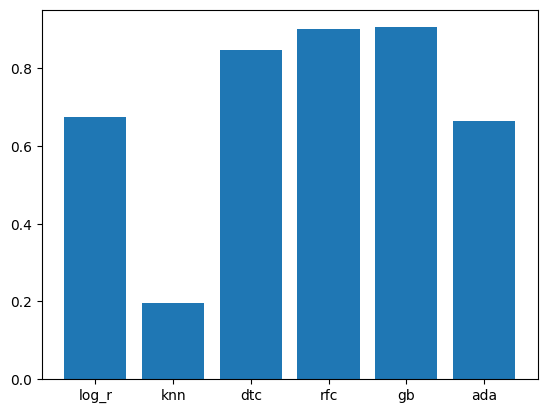

In [261]:
plt.bar(algos, acc)


we can observe that gradient boosting and random forest classifier hasve the highest accuracies

In [264]:
rfc_params = {
    'n_estimators' : [100,200,300,400],
    'criterion' : ['gini','entropy','log_loss']
}
gcv = GridSearchCV(rfc,rfc_params,cv = 5)
gcv.fit(X_train,y_train)
gcv.best_estimator_
gcv.best_params_
gcv.best_score_

0.8940145546348098

In [265]:
gcv.best_estimator_


RandomForestClassifier(criterion='entropy', n_estimators=400)

In [266]:
gcv.best_params_


{'criterion': 'entropy', 'n_estimators': 400}

create submission

In [279]:
df_test

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [305]:
id = final_df['id']

In [306]:
final_df.drop(columns = 'id', inplace=True)

In [307]:
final_df

,Gender,family_history_with_overweight,FAVC,SMOKE,SCC,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Always,...,MTRANS_Public_Transportation,MTRANS_Walking,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1,1,1,0,0,0,0,1,0,0,...,1,0,0.508163,1.682789,1.273786,0.932524,0.350808,1.298389,-0.141769,-1.005016
1,0,1,1,0,0,0,0,1,0,0,...,1,0,-0.509128,-1.114658,-0.818988,-0.833161,-2.462523,1.583678,0.030307,-1.005016
2,0,1,1,0,0,0,0,1,0,0,...,1,0,0.353000,-0.626191,0.927432,1.047997,0.350808,0.965029,-1.159701,-0.592995
3,1,1,1,0,0,0,0,1,0,0,...,1,0,-0.512705,-1.642760,0.623672,-0.833161,0.319733,1.234234,-1.046828,-1.005016
4,0,1,1,0,0,0,0,1,0,0,...,1,0,0.353000,-0.805996,0.668336,1.047997,0.350808,1.016818,-1.159701,0.213881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,1,1,0,0,0,0,0,1,0,0,...,1,0,-0.107749,0.252936,-0.358246,0.696661,0.350808,-1.688533,-0.199274,0.275664
13836,0,0,1,0,0,0,0,1,0,0,...,1,0,0.870277,-1.227324,-0.972181,1.047997,0.350808,-0.052428,-1.159701,-1.005016
13837,0,0,1,0,0,0,1,0,0,0,...,1,0,-0.175379,-1.277495,-1.647125,1.047997,-0.670797,-0.052428,1.160623,0.639766
13838,1,1,1,0,0,0,0,1,0,0,...,1,0,-0.509128,-0.889324,-1.316865,-0.833161,0.350808,-0.052428,2.410322,2.284548


In [335]:
pred = gb.predict(final_df)

In [336]:
pred

array([3, 5, 3, ..., 0, 1, 3])

In [337]:
#inverse transform this pred

pred = le.inverse_transform(pred)
len(pred)

13840

In [331]:
a = le.fit_transform(df['NObeyesdad'])
a

array([6, 1, 0, ..., 7, 7, 7])

In [330]:
df['NObeyesdad']

0        Overweight_Level_II
1              Normal_Weight
2        Insufficient_Weight
3           Obesity_Type_III
4        Overweight_Level_II
                ...         
13835                    NaN
13836                    NaN
13837                    NaN
13838                    NaN
13839                    NaN
Name: NObeyesdad, Length: 34598, dtype: object

In [339]:
#create a df of df_test[id] and pred

final_sub = pd.DataFrame()
final_sub['id'] = df_test['id']
final_sub['NObeyesdad'] = pred
final_sub

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_II
3,20761,Obesity_Type_I
4,20762,Obesity_Type_I
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [340]:
final_sub.to_csv('submission2.csv')